### Settings

In [2]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.8 MB/s eta 0:00:00
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 1.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 1.1 MB/s eta 0:00:0000:0100:01
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
# Show full string content in all DataFrame cells
pd.set_option('display.max_colwidth', None)

### Load Data


- Firstly, load loccally the following two `.txt` files:
- `descriptions.txt`: it contains the titles and descriptions of the `276, 453` products. Each row of the
file contains the ID of a product and its title and description (if any). The following string is used
to separate the ID from the textual content: |= |.

- `y train.txt`: this file contains the class labels of 182, 006 samples. Each sample is a product and
corresponds to a node in the graph. Each row of the file contains the ID of a product and its class
label. The comma character (,) is used to separate the ID of the product from the class label


### Load Description Data

In [5]:
# File paths
file1 = './data_files/description_part_1.txt'
file2 = './data_files/description_part_2.txt'

# Function to load and parse one file
def load_descriptions(filepath):
    data = []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            if '|=|' in line:
                product_id, text = line.strip().split('|=|', 1)
                data.append((product_id.strip(), text.strip()))
    return pd.DataFrame(data, columns=['product_id', 'title_description'])

# Load and combine both files into a single DataFrame
df1 = load_descriptions(file1)
df2 = load_descriptions(file2)
combined_df = pd.concat([df1, df2], ignore_index=True)

# Final DataFrame
combined_df


product_id  \
0               0   
1               1   
2               2   
3               3   
4               4   
...           ...   
276448     276448   
276449     276449   
276450     276450   
276451     276451   
276452     276452   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [6]:
# Convert product_id to int (force conversion, drop or handle errors if needed)
combined_df['product_id'] = pd.to_numeric(combined_df['product_id'], errors='coerce').astype('Int64')
# Ensure title_description is string
combined_df['title_description'] = combined_df['title_description'].astype(str)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276453 entries, 0 to 276452
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   product_id         276453 non-null  Int64 
 1   title_description  276453 non-null  object
dtypes: Int64(1), object(1)
memory usage: 4.5+ MB


In [7]:
combined_df

product_id  \
0                0   
1                1   
2                2   
3                3   
4                4   
...            ...   
276448      276448   
276449      276449   
276450      276450   
276451      276451   
276452      276452   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

### Load Train Data

In [8]:
# Read the file into a DataFrame
y_train_df = pd.read_csv('./y_train.txt', sep=',', header=None, names=['product_id', 'label'])
# Display the shape and first few rows
print(f"Loaded {y_train_df.shape[0]} rows.")
y_train_df

Loaded 182006 rows.


,product_id,label
0,66795,9
1,242781,3
2,91280,2
3,56356,5
4,218494,0
...,...,...
182001,275200,0
182002,52191,2
182003,149974,1
182004,9664,5


### Itegrate Data from Training and Description (Text)

In [9]:
# Perform left join on product_id
merged_df = y_train_df.merge(combined_df, on='product_id', how='left')
# Show shape and preview
print(f"Merged DataFrame has {merged_df.shape[0]} rows.")
merged_df

Merged DataFrame has 182006 rows.


,product_id,label,title_description
0,66795,9,"Pro-tec Classic Skate Independent Skateboard Helmet Often imitated, never duplicated that's the Classic Pro-Tec helmet. Our 2 stage soft foam liner and the newly added EVA crown pad keep things comfortable and lightweight, making this the style of choice season after season."
1,242781,3,Callaway Golf RAZR Staff Cart Bag NEW CALLAWAY GOLF TOUR STAFF BAG RAZR BLACK RED 11
2,91280,2,"Heckler and Koch Entourage Knife Combo with Edged BK Coated Blade (Black, 8.44-Inch) For more than a half century, Heckler and Koch has been a leading designer and manufacturer of military, law enforcement and civilian firearms. HK&#x2019;s commitment to quality, innovation and safety make them an industry leader in reliability and technology. The Mini Entourage Series are new auto with enlarged push button and are made of integrated safety 440C stainless steel, flat grind tanto blade. Enhanced spring design for improved response time. 6061-T6 black anodized hard aluminum handle with reversible tip-up pocket clip . The combo-edged blade has blade length of 3.74-Inch and the overall length is 8.44-Inch."
3,56356,5,"Reelight Sl120 Flashing Extended Bicycle Headlight and Tail Light Set The Reelight SL120 Extended uses high power, ultra bright LED bulbs. Fits on most bicycles with roller and disc brakes. ( maximum diameter of 160mm/6"" ) The front and rear lights are flashing when the wheel is in motion. Features a capacitor to retain a two minute charge while the bicycle is stopped."
4,218494,0,Columbia Boys 8-20 Bug Shield Pant
...,...,...,...
182001,275200,0,"Mens Blood, Sweat and Tears Workout Tank by Pitbull in your choice of color"
182002,52191,2,"1/4&quot; x 500 FT. Shock Cord - BLK Bungee cord is constructed with a core consisting of strands of rubber with a jacket made of abrasion resistant material such as nylon, polypropylene and polyethylene. May Contain Joins or Splits and therefore it may or may not be continous."
182003,149974,1,Spy Optic Clash Wrap Sunglasses
182004,9664,5,"Token Bottom Bracket BB TK877TBT Ex Type Integrated Road Shimano English Thread 68 NEW TOKEN Ceramic Sealed Road Bicycle Bike Bottom Bracket BB English 68 x Length 90 mm ShimanoTitanium Coated Ceramic Ball Bearings EX-TYPE Bottom Braket Bearings-Gold anodized. Ball bearings are made from Silicon Nitride similar to that of turbine blades on engines, 30 times smoother and rounder than steel.Titanium coated. Specially designed for use with integrated cranksets. Compatible with Shimano groups.Brand:TokenModel:TK877TBTSize:Eng 68 x 90 mmColor:RedMaterial:AluminumIncluded in Box:Bottom bracket x 1Warranty:1 Year Products WarrantyWeight:100 grams (0.22 Lbs or 3.53 ounces)Specifications:BSA1.37""x24T for Road & CX to fit 68mm ShellLength: 90 mmMaterial x Bearing Type x Axle:Aluminum x Ceramic BearingsEng 68 x 90 mm Shimano FSA"


In [10]:
# Filter rows where title_description is missing
missing_descriptions = merged_df[merged_df['title_description'].isna()]
# Show how many are missing
print(f"Missing title_descriptions: {missing_descriptions.shape[0]}")
# Extract product IDs to a list
missing_ids = missing_descriptions['product_id'].tolist()
# Display first few IDs
missing_ids[:]  # Adjust or remove slice to see the full list

Missing title_descriptions: 0


[]

In [11]:
merged_df

,product_id,label,title_description
0,66795,9,"Pro-tec Classic Skate Independent Skateboard Helmet Often imitated, never duplicated that's the Classic Pro-Tec helmet. Our 2 stage soft foam liner and the newly added EVA crown pad keep things comfortable and lightweight, making this the style of choice season after season."
1,242781,3,Callaway Golf RAZR Staff Cart Bag NEW CALLAWAY GOLF TOUR STAFF BAG RAZR BLACK RED 11
2,91280,2,"Heckler and Koch Entourage Knife Combo with Edged BK Coated Blade (Black, 8.44-Inch) For more than a half century, Heckler and Koch has been a leading designer and manufacturer of military, law enforcement and civilian firearms. HK&#x2019;s commitment to quality, innovation and safety make them an industry leader in reliability and technology. The Mini Entourage Series are new auto with enlarged push button and are made of integrated safety 440C stainless steel, flat grind tanto blade. Enhanced spring design for improved response time. 6061-T6 black anodized hard aluminum handle with reversible tip-up pocket clip . The combo-edged blade has blade length of 3.74-Inch and the overall length is 8.44-Inch."
3,56356,5,"Reelight Sl120 Flashing Extended Bicycle Headlight and Tail Light Set The Reelight SL120 Extended uses high power, ultra bright LED bulbs. Fits on most bicycles with roller and disc brakes. ( maximum diameter of 160mm/6"" ) The front and rear lights are flashing when the wheel is in motion. Features a capacitor to retain a two minute charge while the bicycle is stopped."
4,218494,0,Columbia Boys 8-20 Bug Shield Pant
...,...,...,...
182001,275200,0,"Mens Blood, Sweat and Tears Workout Tank by Pitbull in your choice of color"
182002,52191,2,"1/4&quot; x 500 FT. Shock Cord - BLK Bungee cord is constructed with a core consisting of strands of rubber with a jacket made of abrasion resistant material such as nylon, polypropylene and polyethylene. May Contain Joins or Splits and therefore it may or may not be continous."
182003,149974,1,Spy Optic Clash Wrap Sunglasses
182004,9664,5,"Token Bottom Bracket BB TK877TBT Ex Type Integrated Road Shimano English Thread 68 NEW TOKEN Ceramic Sealed Road Bicycle Bike Bottom Bracket BB English 68 x Length 90 mm ShimanoTitanium Coated Ceramic Ball Bearings EX-TYPE Bottom Braket Bearings-Gold anodized. Ball bearings are made from Silicon Nitride similar to that of turbine blades on engines, 30 times smoother and rounder than steel.Titanium coated. Specially designed for use with integrated cranksets. Compatible with Shimano groups.Brand:TokenModel:TK877TBTSize:Eng 68 x 90 mmColor:RedMaterial:AluminumIncluded in Box:Bottom bracket x 1Warranty:1 Year Products WarrantyWeight:100 grams (0.22 Lbs or 3.53 ounces)Specifications:BSA1.37""x24T for Road & CX to fit 68mm ShellLength: 90 mmMaterial x Bearing Type x Axle:Aluminum x Ceramic BearingsEng 68 x 90 mm Shimano FSA"


In [13]:
!pip install spacy

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 2.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 1.9 MB/s eta 0:00:00 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.9/443.9 kB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 1.9 MB/s eta 0:00:0000:0100:010m
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.4 MB/s eta 0:00:00-:--:--
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 2.0 MB/s eta 0:00:0000:0100:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 1.8 MB/s eta 0:00:0000:0100:010m
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 4.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


### Basic  NLP Prperocess

In [18]:
import re
import string
import spacy
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Full NLP preprocessing function with lemmatization
def clean_text_with_lemma(text):
    # Lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', ' ', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove digits
    text = re.sub(r'\d+', '', text)

    # Use spaCy to tokenize and lemmatize
    doc = nlp(text)
    tokens = [
        token.lemma_ for token in doc
        if token.lemma_ not in ENGLISH_STOP_WORDS
        and not token.is_punct
        and not token.is_space
        and not token.is_digit
    ]
    
    return ' '.join(tokens)

# Apply to your DataFrame
merged_df['text_clean'] = merged_df['title_description'].apply(clean_text_with_lemma)

In [19]:
merged_df

,product_id,label,title_description,text_clean
0,66795,9,"Pro-tec Classic Skate Independent Skateboard Helmet Often imitated, never duplicated that's the Classic Pro-Tec helmet. Our 2 stage soft foam liner and the newly added EVA crown pad keep things comfortable and lightweight, making this the style of choice season after season.",protec classic skate independent skateboard helmet imitate duplicate s classic protec helmet stage soft foam liner newly add eva crown pad thing comfortable lightweight make style choice season season
1,242781,3,Callaway Golf RAZR Staff Cart Bag NEW CALLAWAY GOLF TOUR STAFF BAG RAZR BLACK RED 11,callaway golf razr staff cart bag new callaway golf tour staff bag razr black red
2,91280,2,"Heckler and Koch Entourage Knife Combo with Edged BK Coated Blade (Black, 8.44-Inch) For more than a half century, Heckler and Koch has been a leading designer and manufacturer of military, law enforcement and civilian firearms. HK&#x2019;s commitment to quality, innovation and safety make them an industry leader in reliability and technology. The Mini Entourage Series are new auto with enlarged push button and are made of integrated safety 440C stainless steel, flat grind tanto blade. Enhanced spring design for improved response time. 6061-T6 black anodized hard aluminum handle with reversible tip-up pocket clip . The combo-edged blade has blade length of 3.74-Inch and the overall length is 8.44-Inch.",heckler koch entourage knife combo edge bk coat blade black inch half century heckler koch lead designer manufacturer military law enforcement civilian firearm hkxs commitment quality innovation safety make industry leader reliability technology mini entourage series new auto enlarged push button make integrated safety c stainless steel flat grind tanto blade enhance spring design improved response time t black anodize hard aluminum handle reversible tipup pocket clip comboedge blade blade length inch overall length inch
3,56356,5,"Reelight Sl120 Flashing Extended Bicycle Headlight and Tail Light Set The Reelight SL120 Extended uses high power, ultra bright LED bulbs. Fits on most bicycles with roller and disc brakes. ( maximum diameter of 160mm/6"" ) The front and rear lights are flashing when the wheel is in motion. Features a capacitor to retain a two minute charge while the bicycle is stopped.",reelight sl flash extend bicycle headlight tail light set reelight sl extend use high power ultra bright lead bulb fit bicycle roller disc brake maximum diameter mm rear light flash wheel motion feature capacitor retain minute charge bicycle stop
4,218494,0,Columbia Boys 8-20 Bug Shield Pant,columbia boy bug shield pant
...,...,...,...,...
182001,275200,0,"Mens Blood, Sweat and Tears Workout Tank by Pitbull in your choice of color",men blood sweat tear workout tank pitbull choice color
182002,52191,2,"1/4&quot; x 500 FT. Shock Cord - BLK Bungee cord is constructed with a core consisting of strands of rubber with a jacket made of abrasion resistant material such as nylon, polypropylene and polyethylene. May Contain Joins or Splits and therefore it may or may not be continous.",quot x ft shock cord blk bungee cord construct core consist strand rubber jacket make abrasion resistant material nylon polypropylene polyethylene contain join split continous
182003,149974,1,Spy Optic Clash Wrap Sunglasses,spy optic clash wrap sunglass
182004,9664,5,"Token Bottom Bracket BB TK877TBT Ex Type Integrated Road Shimano English Thread 68 NEW TOKEN Ceramic Sealed Road Bicycle Bike Bottom Bracket BB English 68 x Length 90 mm ShimanoTitanium Coated Ceramic Ball Bearings EX-TYPE Bottom Braket Bearings-Gold anodized. Ball bearings are made from Silicon Nitride similar to that of turbine blades on engines, 30 times smoother and rounder than steel.Titanium coated. Specially designed for use with integrated cranksets. Compatible with Shimano groups.Brand:TokenModel:TK877TBTSize:Eng 68 x 90 mmColor:RedMaterial:AluminumIncluded in Box:Bottom bracket

In [25]:
merged_df = merged_df.sort_values(by='product_id').reset_index(drop=True)
df_preprocessed = merged_df[['product_id','text_clean','label']]
df_preprocessed

product_id  \
0                0   
1                1   
2                2   
3                3   
4                4   
...            ...   
182001      276445   
182002      276447   
182003      276448   
182004      276450   
182005      276451   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [ ]:
#  simple debug for veryfying correct data ingestion 
i want to 

In [28]:
df_preprocessed.isnull().sum()

product_id    0
text_clean    0
label         0
dtype: int64

### Split & Save Train Test

In [32]:
import os
from sklearn.model_selection import train_test_split

# Create output folder
output_dir = 'split_dataset'
os.makedirs(output_dir, exist_ok=True)

# Stratified, reproducible 80/20 split
train_df, test_df = train_test_split(
    df_preprocessed,
    test_size=0.2,
    stratify=df_preprocessed['label'],
    random_state=42
)

# Sanity checks
print(f"Train size: {len(train_df)}")
print(f"Test size: {len(test_df)}")

print("\nTrain label distribution:")
print(train_df['label'].value_counts(normalize=True))

print("\nTest label distribution:")
print(test_df['label'].value_counts(normalize=True))

# Save to CSV
train_df.to_csv(os.path.join(output_dir, 'train.csv'), index=False)
test_df.to_csv(os.path.join(output_dir, 'test.csv'), index=False)

print("\nData saved to 'split_dataset' folder.")

Train size: 145604
Test size: 36402

Train label distribution:
label
2     0.237686
7     0.103074
10    0.098576
5     0.097916
0     0.083322
4     0.082848
1     0.065170
6     0.041730
11    0.039140
12    0.036222
8     0.036160
3     0.029484
9     0.024807
13    0.008887
15    0.008777
14    0.006202
Name: proportion, dtype: float64

Test label distribution:
label
2     0.237679
7     0.103071
10    0.098593
5     0.097934
0     0.083320
4     0.082853
1     0.065161
6     0.041728
11    0.039146
12    0.036207
8     0.036152
3     0.029476
9     0.024806
13    0.008873
15    0.008791
14    0.006208
Name: proportion, dtype: float64

Data saved to 'split_dataset' folder.


### Distributions Train & Test

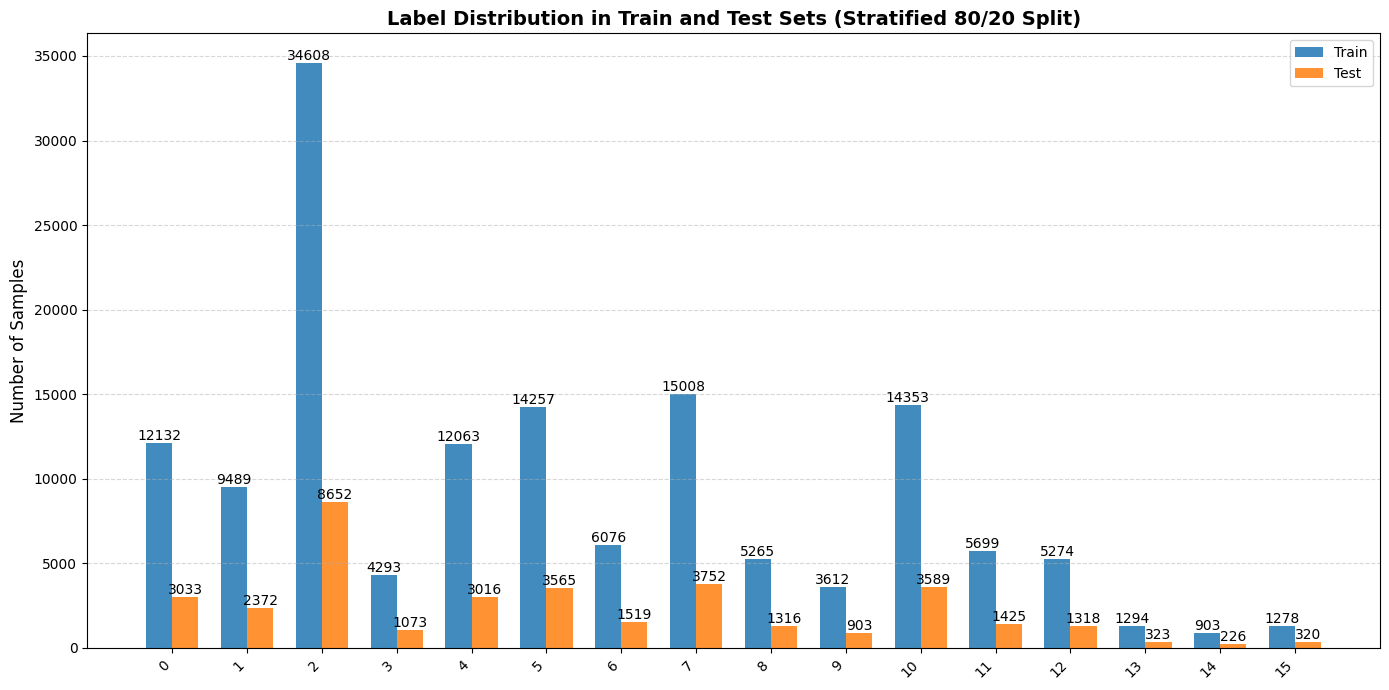

In [37]:
import os
import matplotlib.pyplot as plt

# Count label frequencies (absolute)
train_counts = train_df['label'].value_counts()
test_counts = test_df['label'].value_counts()

# Ensure all labels are represented
labels = sorted(set(train_counts.index).union(test_counts.index))
train_values = [train_counts.get(label, 0) for label in labels]
test_values = [test_counts.get(label, 0) for label in labels]

# Setup bar positions
x = range(len(labels))
width = 0.35

# Plot
plt.figure(figsize=(14, 7))
bars1 = plt.bar([i - width/2 for i in x], train_values, width=width, label='Train', alpha=0.85)
bars2 = plt.bar([i + width/2 for i in x], test_values, width=width, label='Test', alpha=0.85)

# Annotate each bar with its value
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

# Final plot formatting
plt.xticks(ticks=x, labels=labels, rotation=45, ha='right')
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Label Distribution in Train and Test Sets (Stratified 80/20 Split)', fontsize=14, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

# Save the figure
os.makedirs("figures", exist_ok=True)
plt.savefig("figures/distribution_train_test.png", dpi=300, bbox_inches='tight')
plt.show()
